In [42]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Configure matplotlib to show figures embedded in the notebook
# %matplotlib inline

In [43]:
LINE_LIM = 111
file_name = '../squat_file'

with open(file_name) as f:
    content = f.readlines()

content = [x.strip() for x in content] 

In [44]:
content = content[:111]
content

['STABLE: 3996, {"heeldom": 0.6642598023957306}',
 'STABLE: 3956, {"pron": 0.5134631926952321, "heeldom": 0.6165431062152397}',
 'STABLE: 3987, {"heeldom": 0.7373854718266571}',
 'STABLE: 4003, {"heeldom": 0.8343064201527309}',
 'STABLE: 3968, {"heeldom": 0.8169318130593819}',
 'STABLE: 4004, {"pron": 0.5156534904406856, "heeldom": 0.9282188831661234}',
 'STABLE: 3970, {"heeldom": 0.8658482671729683}',
 'STABLE: 4000, {"heeldom": 0.8524234931968636}',
 'STABLE: 3986, {"heeldom": 0.8730953448467215}',
 'STABLE: 3986, {"heeldom": 0.8330344751922004}',
 'STABLE: 3979, {"heeldom": 0.8344283863423927}',
 'STABLE: 3996, {"heeldom": 0.8806562857785734}',
 'STABLE: 4023, {"pron": 0.5117924591576172, "heeldom": 0.9006735567436399}',
 'STABLE: 3980, {"heeldom": 0.8279226617884654}',
 'STABLE: 3999, {"heeldom": 0.7321264139413984}',
 'STABLE: 4095, {"heeldom": 0.7896477085009322}',
 'DESCENT: 0.01674641148325359, {"heeldom": 0.6385614943402148}',
 'DESCENT: 0.05154414963027403, {"heeldom": 0.6197

In [46]:
import json

colors = { 'sup': 'b',
           'heellift': 'r',
           'pron': 'y', 
           'heeldom': 'm',
           'normal': 'g' }

AREA_SCALE = 10

X, Y, S, C =  [], [], [], [] #x, y, area, colors
x = 0
for line in content:
    plot_obj = {}
    line = line.split(', ')
    pos_info = line[0].split(': ')
    pos = pos_info[0]
    if pos == 'STABLE':
        y = 1 if int(pos_info[1]) > 0 else 0
    elif pos == 'DESCENT':
        y = 1 - float(pos_info[1])
    else:
        y = float(pos_info[1])   
    if len(line) > 2:
        error_str = line[1] + ', ' + line[2]
    else:
        error_str = line[1]
    errors = json.loads(error_str)
    if len(errors) == 0:
        area = np.pi * (AREA_SCALE * 0.5)**2
        S.append(area)
        C.append(colors['normal'])
        Y.append(y)
        X.append(x)
    else:
        for k in errors:
            color = colors[k]
            C.append(color)
            area = np.pi * (AREA_SCALE * errors[k])**2
            S.append(area)
            Y.append(y)
            X.append(x)
    x += 25


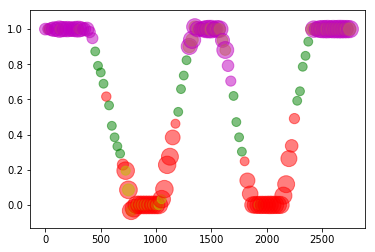

In [47]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
colors = ['b' for x in X]

plt.scatter(X, Y, c=C, s=S, alpha=0.5)
plt.show()

In [33]:
area

array([  5.46356411e+02,   5.71821686e+02,   3.03219923e+00,
         8.61833880e+01,   1.65440974e+02,   4.05094025e+02,
         2.27861222e+00,   3.70723305e+01,   2.79902572e+02,
         5.89669414e+01,   7.00110192e+02,   1.23565225e+02,
         6.85951010e+02,   4.10915670e+02,   2.17925141e+00,
         7.13468193e+01,   6.62017758e+02,   2.52764810e+00,
         4.54349395e-02,   2.41276360e+02,   2.99138706e+02,
         4.65599684e+02,   1.33718165e+02,   3.53734133e+02,
         2.41557244e+02,   3.54419067e+02,   4.35229796e+01,
         1.67691248e+02,   2.85224203e+01,   3.56872637e+02,
         2.81075772e+02,   6.59344369e+02,   3.07628310e+02,
         5.14346441e+02,   1.62129790e+02,   6.29284888e+02,
         1.73169401e+02,   6.57556115e+02,   1.30924259e+02,
         2.86492935e+01,   2.04324400e+02,   1.13334863e+02,
         3.74418552e+01,   8.41340587e+01,   7.95699025e+01,
         4.93304542e+01,   4.26651715e+02,   4.44975055e+02,
         5.56420325e+02,